In [18]:
from functions import *
from parameters_GaAs_QW import *
import pickle
import matplotlib.pyplot as plt
import scienceplots
#plt.style.use('science')

In [2]:
with open('results/splitting_study/dt=300.0_E_pump=0_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_absorption_probe.pickle', 'rb') as output_file:
    lin_abs = pickle.load(output_file)

Exciton binding energy:  -0.008674174174174043  eV
exciton resonance frequency:  -0.013178385673932487
[0.09020051 0.09029439 0.09030334 0.09022727]


/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


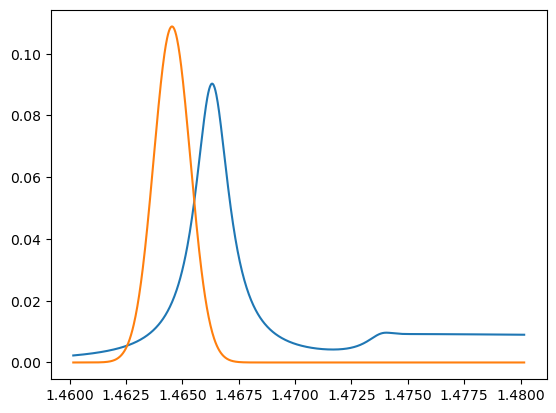

In [3]:
plt.plot(hbar*(omega_list+omega_pump), lin_abs, label = 'linear_absorption')
plt.plot(hbar*(omega_list+omega_pump), 2*fouriertrafo(gauss_pulse(tlist, 1000*E_probe, sigma_pump, 0, detuning = -0.0014/hbar), omega_list, tlist)) # -0.0014/hbar
E_b = hbar*(omega_list[np.argmax(lin_abs)]+omega_pump)-E_G
print('Exciton binding energy: ',E_b, ' eV')
print('exciton resonance frequency: ', E_b/hbar)
print(lin_abs[np.argmax(lin_abs)-2:np.argmax(lin_abs)+2])

In [2]:
from matplotlib.colors import to_rgb
import colorsys
def desaturate_color(color, factor=0.9):
    # Konvertiere die Farbe in den RGB-Farbraum
    r, g, b = to_rgb(color)
    # Konvertiere die Farbe in den HSV-Farbraum
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    # Reduziere die Sättigung
    s *= factor
    # Konvertiere die Farbe zurück in den RGB-Farbraum
    desaturated_color = colorsys.hsv_to_rgb(h, s, v)
    return desaturated_color

In [28]:
fluences = ['0', '0.283', '1.415', '2.829', '8.487', '28.290','70.725', '99.015','150','200', '260', '320', '400'] #,

t_probe = 4400
energyresolution = 1000
E_start = -0.025 + 0.012903883497007542 * hbar
E_stop = 0.015 + 0.012903883497007542 * hbar
omega_list = np.linspace(E_start/hbar,E_stop/hbar,energyresolution)
E_list = 1000 * hbar*(omega_list- 0.012903883497007542)
comments = ''
absorptions = []
#
with open(r"results/splitting_study/dt=-600.0_E_pump=0_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.01_Ps.pickle".format(0), 'rb') as input_file:
        polarization = pickle.load(input_file)[2]
        print(1,'/',len(fluences))
        absorptions.append(get_absorption_probe(polarization, t_probe, tlist,omega_list, E_probe, sigma_probe, omega_probe, n_medium, pulse_shape = 'gauss', method = 'lambert_beer'))
for i, fluence in enumerate(fluences[1:]):
    with open(r"results/splitting_study/dt=-600.0_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_lambert_beer.pickle".format(fluence), 'rb') as input_file:
        absorption = pickle.load(input_file)
        print(i+2,'/',len(fluences))
        absorptions.append(absorption)
       


#for i, fluence in enumerate(fluences[1:]):
 #   with open(r"results/splitting_study/dt=-600.0_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.01_Ps.pickle".format(fluence), 'rb') as input_file:
  #      polarization = pickle.load(input_file)[2]
   #     print(i+2,'/',len(fluences))
    #    absorption = get_absorption_probe(polarization, t_probe, tlist,omega_list, E_probe, sigma_probe, omega_probe, n_medium, pulse_shape = 'gauss', method = 'lambert_beer')
     #   absorptions.append(absorption)
      #  with open(r"results/splitting_study/dt=-600.0_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.01.pickle".format(fluence), 'wb') as output_file:
       #     pickle.dump(absorption, output_file)


1 / 13
2 / 13
3 / 13
4 / 13
5 / 13
6 / 13
7 / 13
8 / 13
9 / 13
10 / 13
11 / 13
12 / 13
13 / 13


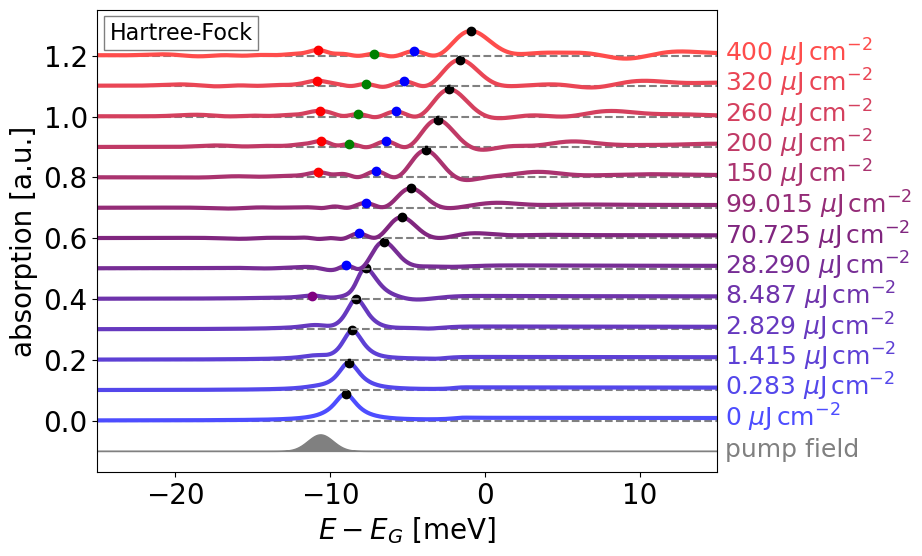

In [30]:
import matplotlib.cm as cm  # Für den Farbverlauf
colorList = [['black'],['black'], ['black'], ['black'], ['purple','black'], ['blue','black'], ['blue','black','none'],['blue','black','none'],  ['red','blue','black','none'], ['red','green','blue','black','none'], ['red','green','blue','black','none'], ['red','green','blue','black','none'], ['red','green','blue','black','none']]
# Increase the global font size for all plot elements
plt.rcParams.update({
    'font.size': 20,         # General font size
    'axes.titlesize': 20,    # Title font size
    'axes.labelsize': 20,    # X and Y axis label font size
    'xtick.labelsize': 20,   # X tick labels font size
    'ytick.labelsize': 20,   # Y tick labels font size
    'legend.fontsize': 20,   # Legend font size
    'figure.titleweight': 'bold' # Optional: make the title bold
})

offset = 0.1
fig, ax = plt.subplots(figsize=(8, 6))

# Anzahl der Spektren
num_spektren = len(absorptions)

# Farbverlauf von Blau zu Rot erzeugen
colors = cm.brg(np.linspace(0, 0.5, num_spektren))
#plot electric field
feld = fouriertrafo(gauss_pulse(tlist, 1000*E_probe, sigma_pump, 0, detuning = -0.0014/hbar), omega_list, tlist)
ax.fill_between(E_list,-offset, feld-offset, color = 'grey')
ax.text(E_list[-1]+0.5 , np.mean(feld - offset), "pump field",
        va='center', ha='left', fontsize=18, color='grey')
# Plotte jedes Spektrum mit einem Offset und speichere die Position für die Legende
for i, (spektrum, color) in enumerate(zip(absorptions, colors)):
    # Zeichne die graue Linie auf der Höhe des Offsets
    ax.axhline(i * offset, color='gray', linestyle='--', linewidth=1.5)
    
    # Plotte das Spektrum mit Offset und der interpolierten Farbe
    ax.plot(E_list, spektrum + i * offset, label=f'Feldstärke: {fluences[i]}', color=desaturate_color(color,0.7), linewidth = 3)
    #markiere die maxima
    maxima, _ = find_peaks(absorptions[i], prominence = 0.004, width = (0,50), rel_height = 0.1, height = 0.006)
    for j in range(len(maxima)):
        plt.plot(E_list[maxima[j]], absorptions[i][maxima[j]]+ i * offset, "o", color = colorList[i][j])

# Jetzt die Legende erstellen
for i, (spektrum, color) in enumerate(zip(absorptions, colors)):
    # Den Text neben dem jeweiligen Spektrum platzieren
    ax.text(E_list[-1]+0.5 , np.mean(spektrum + i * offset), str(fluences[i]) + r" $\mu\text{J}\,\text{cm}^{-2}$",
            va='center', ha='left', fontsize=18, color=desaturate_color(color,0.7))

# Achsenlabels und Titel
ax.set_xlim(E_list[0],E_list[-1])
ax.set_xlabel(r"$E-E_G$ [meV]", fontsize = 20)
ax.set_ylabel('absorption [a.u.]', fontsize = 20)
plt.text(0.02, 0.975, 'Hartree-Fock', transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
#ax.set_yticklabels([])
#ax.set_yticks([])
plt.xticks(fontsize = 20)

#plt.savefig(r"results/splitting_study/absorptions_fluences_no_interband_rel_full_dominant_peaks.pdf",bbox_inches = 'tight')
# Zeige den Plot
plt.show()

#remove the linear spectrum from the fluences and absorption lists
#fluences = fluences[1:]
#absorptions = absorptions[1:]



In [37]:
from scipy.signal import find_peaks
# find rabi frequencies from single shortest oscillation
for i in range(len(fluences)):
    maxima, _ = find_peaks(absorptions[i], height=0)


experimental_black_x = [0.42052144659377627,5.466778805719092,0.975609756097561,4.474348191757779,9.991589571068124,7.737594617325484,2.2371740958788897,2.7081581160639194,3.1455004205214467,1.5475189234650968,4.457527333894029, 12.228763666947014,15.794785534062237,18.70479394449117]
experimental_black_y = [-0.005242463958060384, 1.4207077326343374, 0.12057667103538705, 1.1480996068152027, 2.6159895150720835, 1.9659239842726084, 0.3931847968545217, 0.5399737876802106, 0.6448230668414148, 0.22542595019659295,1.1690694626474443, 3.391874180865006, 4.461336828309307, 5.4259501965923995]
experimental_blue_x = [3.1623212783851975,7.737594617325484,9.991589571068124, 12.245584524810765, 15.811606391925988, 18.72161480235492]
experimental_blue_y = [0.6448230668414148, 0.7077326343381394,0.7496723460026207,0.8545216251638266,0.7496723460026207,0.7077326343381394]#
experimental_red_x = [2.2371740958788897,2.72497897392767, 3.1455004205214467, 4.474348191757779,5.483599663582843,  7.7544154751892345,10.008410428931876,12.245584524810765,15.811606391925988,18.72161480235492]
experimental_red_y = [-0.5923984272608127,-0.634338138925294,-0.634338138925294,-0.7182175622542601,-0.8859764089121889, -0.7601572739187414, -0.9488859764089117, -1.0117955439056363, -0.7182175622542601, -0.7391874180864999]
experimental_purple_x = [4.491169049621531, 5.466778805719092, 7.737594617325484, 9.991589571068124,12.211942809083263,15.845248107653491]
experimental_purple_y = [-2.9200524246395805,-3.0668414154652694,-3.8217562254259505, -4.576671035386632, -5.0799475753604195, -6.1913499344692005]
experimental_black_x,experimental_black_y = zip(*sorted(zip(experimental_black_x, experimental_black_y)))
experimental_red_x,experimental_red_y = zip(*sorted(zip(experimental_red_x, experimental_red_y)))
experimental_blue_x,experimental_blue_y = zip(*sorted(zip(experimental_blue_x, experimental_blue_y)))
experimental_purple_x,experimental_purple_y = zip(*sorted(zip(experimental_purple_x, experimental_purple_y)))
#plt.plot(fluences, -hbar*(omega_list[peaks]- 0.012903883497007542))


[400]
[405]
[411]
[417]
[346 432]
[401 461]
[421 490 610]
[432 505 646]
[356 449 529 711]
[360 406 465 548 768]
[358 420 481 567 828]
[354 432 494 584 882]
[355 446 510 602 941]


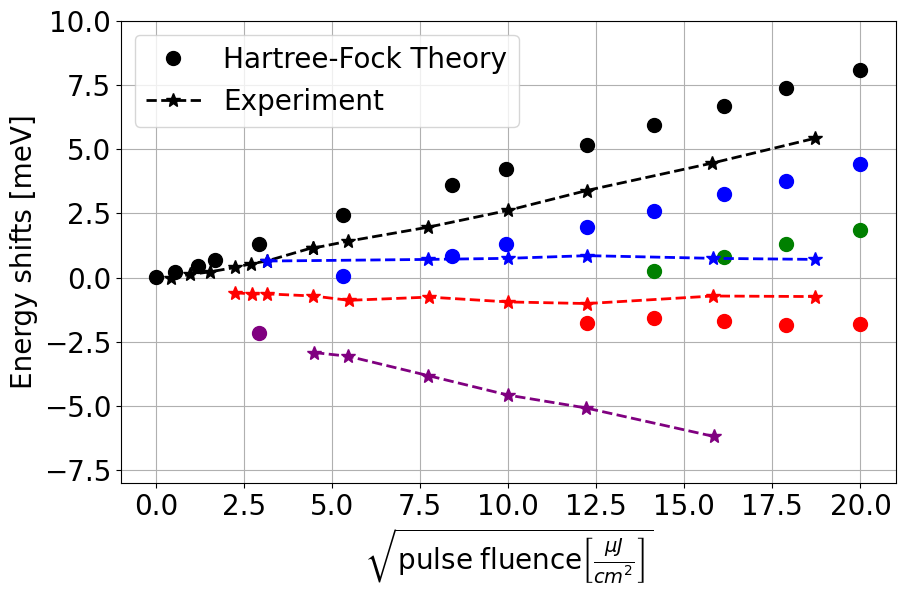

In [38]:
import itertools

maxima_positions = []
all_energies = []

# Define connections as tuples in the format (fluence_index_1, peak_index_1, fluence_index_2, peak_index_2)
# Each tuple represents a connection between a specific maximum at one fluence to another maximum at the next fluence
connections = [
    (0, 0, 1, 0,'black'),
      (1, 0, 2, 0,'black'),
          (3, 0, 4, 0, 'red'),
      #      (4, 0, 5, 0, 'grey'),
     #         (5, 0, 6, 0, 'grey'),
    (2, 0, 3, 1,'black'),
    (3, 1, 4, 1,'black'),
    #  (4, 1, 5, 2, 'grey'),
        (4, 1, 5, 3,'black'),
          (4, 0, 5, 1, 'red'), 
           (5, 0, 6, 1, 'purple'),
            (6, 1, 7, 0, 'purple'),
        #     (5, 1, 6, 2, 'grey'),
         #     (6, 2, 7, 1, 'grey'),
               (5, 1, 6, 3, 'red'),
                (6, 3, 7, 2, 'red'),
        #         (5, 2, 6, 4, 'grey'),
                  (5, 2, 6, 5, 'blue'),
       #            (6, 4, 7, 3, 'grey'),
      (6, 5, 7, 4, 'blue'),
      (5, 3, 6, 6,'black'),
      (6, 6, 7, 5,'black')
      #(5, 3, 6, 7, 'grey'),
     # (6, 7, 7, 6, 'grey'),
    #  (6, 7, 7, 7, 'grey')
        # Connect second maximum at fluence[0] to third maximum at fluence[1]
      # Example connection pattern (replace with your desired connections)
    # Add more connections as needed
]

# Collecting maxima positions for each fluence
for i in range(len(fluences)):
    # Find peaks in the absorption data for each fluence
    
    maxima, _ = find_peaks(absorptions[i], prominence = 0.004, width = (0,50), rel_height = 0.1, height = 0.006)
    energies =np.array(exciton_energy-(-hbar*(omega_list[maxima]+omega_pump)+E_G))*1000
    # Store the positions of maxima for the current fluence
    maxima_positions.append(maxima)
    all_energies.append(energies)
    print(maxima)

# Plotting
plt.figure(figsize=(10, 6))

# Define color cycle for each branch
color_cycle = itertools.cycle(plt.cm.tab10.colors)  # Use a colormap for different branches
#colorList = [['black'],['black'], ['black'], ['purple','black'], ['purple','black'], ['purple','blue','black'], ['blue','black'],['blue','black'],  ['red','blue','black','grey'], ['red','green','blue','black','grey'], ['red','green','blue','black','grey'], ['red','green','blue','black','grey'], ['red','green','blue','black','grey']]
# Plot each set of maxima positions for each fluence, using sqrt of fluence as x-coordinates
for i, energies in enumerate(all_energies):
    sqrt_fluence = np.sqrt(float(fluences[i]))  # Take the square root of the fluence value
    # Plot maxima for the current fluence with square root fluence as x-position
   # plt.plot([sqrt_fluence], high_energy_shifts[i], 'x', label=fluences[i])
    for j in range(len(energies)):
        if i == 0:
            plt.plot(sqrt_fluence, energies[j], 'o',color = colorList[i][j], markersize = 10, label = 'Hartree-Fock Theory')
        else:    
            plt.plot(sqrt_fluence, energies[j], 'o',color = colorList[i][j], markersize = 10)
    

# Plot connections as dashed lines
#for (f1, p1, f2, p2, col) in connections:
    # Get square root of fluences for accurate spacing
   # x1, y1 = np.sqrt(float(fluences[f1])), all_energies[f1][p1]
   # x2, y2 = np.sqrt(float(fluences[f2])), all_energies[f2][p2]
    # Draw a dashed line between connected maxima with a unique color for each branch
  #  plt.plot([x1, x2], [y1, y2], linestyle='--', color=desaturate_color(col,0.7), linewidth=3)
plt.plot(experimental_black_x, experimental_black_y, color = 'black', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2, label = 'Experiment')
plt.plot(experimental_red_x, experimental_red_y, color = 'red', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2)
plt.plot(experimental_blue_x, experimental_blue_y, color = 'blue', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2)
plt.plot(experimental_purple_x, experimental_purple_y, color = 'purple', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2)
#plt.scatter(experimental_red_x, experimental_red_y, color = 'red', marker = '*', s = 150)
#plt.scatter(experimental_blue_x, experimental_blue_y, color = 'blue', marker = '*', s = 150)
#plt.scatter(experimental_purple_x, experimental_purple_y, color = 'purple', marker = '*', s = 150)

# Set labels and title
plt.xlabel(r"$\sqrt{\mathrm{pulse\;fluence} \left[\frac{\mu J}{cm^2}\right]}$")
plt.ylabel('Energy shifts [meV]')
plt.ylim(-8,10)
#plt.title('Tree Diagram of Maxima Positions with Branch Connections')
plt.grid(True)
#plt.text(0.02, 0.975, 'Hartree-Fock', transform=plt.gca().transAxes,
 #        fontsize=13, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
# Display plot
#plt.savefig(r"results/splitting_study/shifts_no_interband_rel_full_prominent_peaks.pdf",bbox_inches = 'tight')
plt.show()



1 / 13
2 / 13
3 / 13
4 / 13
5 / 13
6 / 13
7 / 13
8 / 13
9 / 13
10 / 13
11 / 13
12 / 13
13 / 13


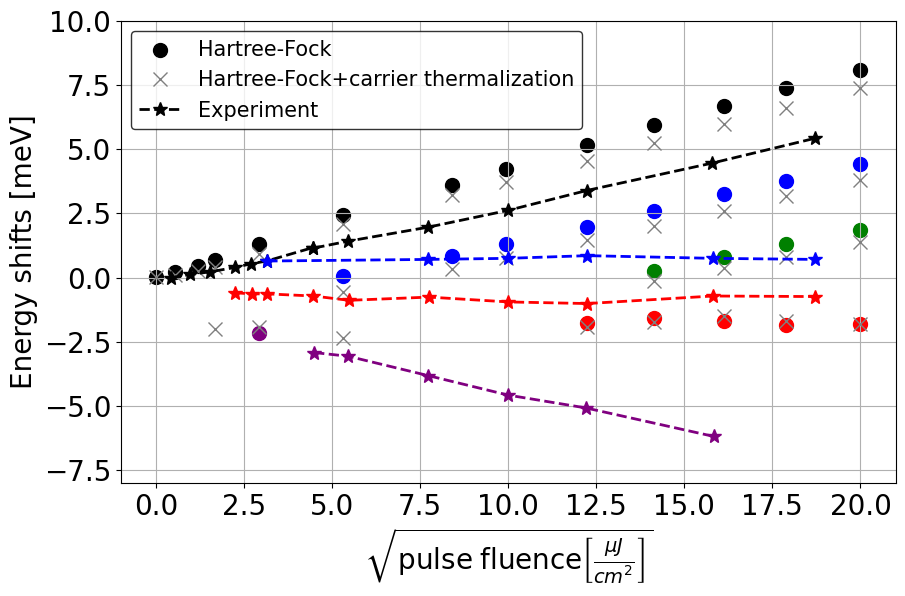

In [40]:
import itertools
fluences = fluences = ['0', '0.283', '1.415', '2.829', '8.487', '28.290','70.725', '99.015','150','200', '260', '320', '400']
maxima_int_positions = []
all_energies_int = []
absorptions_int = []
#
#plt.style.use(["science", "no-latex"])
colorList_int = [['black'],['black'], ['black'], ['purple','black'], ['purple','black'], ['purple','blue','black'], ['blue','black','none'],['blue','black','none'],  ['red','blue','black','none'], ['red','green','blue','black','none'], ['red','green','blue','black','none'], ['red','green','blue','black','none'], ['red','green','blue','black','none']]
with open(r"results/splitting_study/dt=-600.0_E_pump=0_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.01_Ps.pickle".format(0), 'rb') as input_file:
    polarization = pickle.load(input_file)[2]
    print(1,'/',len(fluences))
    absorptions_int.append(get_absorption_probe(polarization, t_probe, tlist,omega_list, E_probe, sigma_probe, omega_probe, n_medium, pulse_shape = 'gauss', method = 'lambert_beer'))
for i, fluence in enumerate(fluences[1:]):
    with open(r"results/splitting_study/dt=-600.0_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.01.pickle".format(fluence), 'rb') as input_file:
        absorption = pickle.load(input_file)
        print(i+2,'/',len(fluences))
        absorptions_int.append(absorption)
#for i, fluence in enumerate(fluences[1:]):
 #   with open(r"results/splitting_study/dt=-600.0_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.01_Ps.pickle".format(fluence), 'rb') as input_file:
  #      polarization = pickle.load(input_file)[2]
   #     print(i+2,'/',len(fluences))
    #    absorption = get_absorption_probe(polarization, t_probe, tlist,omega_list, E_probe, sigma_probe, omega_probe, n_medium, pulse_shape = 'gauss', method = 'lambert_beer')
     #   absorptions_int.append(absorption)
      #  with open(r"results/splitting_study/dt=-600.0_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.01.pickle".format(fluence), 'wb') as output_file:
       #     pickle.dump(absorption, output_file)
       
# Define connections as tuples in the format (fluence_index_1, peak_index_1, fluence_index_2, peak_index_2)
# Each tuple represents a connection between a specific maximum at one fluence to another maximum at the next fluence
connections = [
    (0, 0, 1, 1,'black'),
      (1, 1, 2, 1,'black'),
          (2, 1, 3, 1, 'black'),
            (3, 1, 4, 3, 'black'),
              (4, 3, 5, 5, 'black'),
              (5, 5, 6, 6,'black'),
    (1, 0, 2, 0,'red'),
      (2, 0, 3, 0, 'red'),
        (3, 0, 4, 1,'red'),
          (4, 1, 5, 3, 'red'), 
           (5, 3, 6, 3, 'red'),
    (4, 2, 5, 4, 'blue'),
      (5, 4, 6, 5, 'blue'),
    (4, 0, 5, 1, 'purple'),
      (5, 1, 6, 1, 'purple')
        # Connect second maximum at fluence[0] to third maximum at fluence[1]
      # Example connection pattern (replace with your desired connections)
    # Add more connections as needed
]

# Collecting maxima positions for each fluence
for i in range(len(fluences)):
    # Find peaks in the absorption data for each fluence
    maxima_int, _ = find_peaks(absorptions_int[i], prominence = 0.004, width = (0,50), rel_height = 0.1, height = 0.006)
    energies_int =np.array(exciton_energy-(-hbar*(omega_list[maxima_int]+omega_pump)+E_G))*1000
    # Store the positions of maxima for the current fluence
    maxima_int_positions.append(maxima_int)
    all_energies_int.append(energies_int)

# Plotting
plt.figure(figsize=(10, 6))

# Define color cycle for each branch
color_cycle = itertools.cycle(plt.cm.tab10.colors)  # Use a colormap for different branches

# Plot each set of maxima positions for each fluence, using sqrt of fluence as x-coordinates
for i, energies in enumerate(all_energies):
    sqrt_fluence = np.sqrt(float(fluences[i]))  # Take the square root of the fluence value
    # Plot maxima for the current fluence with square root fluence as x-position
   # plt.plot([sqrt_fluence], high_energy_shifts[i], 'x', label=fluences[i])
    for j in range(len(energies)):
        if i == 0:
            plt.scatter(sqrt_fluence, energies[j], s = 100,color = colorList[i][j], label = 'Hartree-Fock')
        else:    
            plt.scatter(sqrt_fluence, energies[j], s = 100,color = colorList[i][j])
for i, energies_int in enumerate(all_energies_int):
    sqrt_fluence = np.sqrt(float(fluences[i]))            
    for j in range(len(energies_int)):
        if i == 0:
            plt.plot(sqrt_fluence, energies_int[j], 'x',color = 'grey', markersize = 10, label = 'Hartree-Fock+carrier thermalization')
        else:    
            plt.plot(sqrt_fluence, energies_int[j], 'x',color = 'grey', markersize = 10)
    
plt.plot(experimental_black_x, experimental_black_y, color = 'black', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2, label = 'Experiment')
plt.plot(experimental_red_x, experimental_red_y, color = 'red', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2)
plt.plot(experimental_blue_x, experimental_blue_y, color = 'blue', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2)
plt.plot(experimental_purple_x, experimental_purple_y, color = 'purple', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2)    

# Plot connections as dashed lines
#for (f1, p1, f2, p2, col) in connections:
    # Get square root of fluences for accurate spacing
 #   x1, y1 = np.sqrt(float(fluences[f1])), all_energies[f1][p1]
 #   x2, y2 = np.sqrt(float(fluences[f2])), all_energies[f2][p2]
    # Draw a dashed line between connected maxima with a unique color for each branch
   # color = next(color_cycle)
 #   plt.plot([x1, x2], [y1, y2], linestyle='--', color=desaturate_color(col,0.7), linewidth=3)

# Set labels and title
plt.xlabel(r"$\sqrt{\mathrm{pulse\;fluence} \left[\frac{\mu J}{cm^2}\right]}$", fontsize = 20)
plt.ylabel('Energy shifts [meV]', fontsize = 20)
#plt.title('Tree Diagram of Maxima Positions with Intraband Relaxation')
plt.grid(True)
#plt.text(0.02, 0.975, 'Hartree-Fock + intraband rel.', transform=plt.gca().transAxes,
 #        fontsize=13, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.ylim(-8,10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15, loc = 'upper left',frameon=True, facecolor='white', edgecolor='black')
# Display plot
plt.savefig(r"results/splitting_study/shifts_Vergleich.pdf",bbox_inches = 'tight')
plt.show()

[355 510 602]


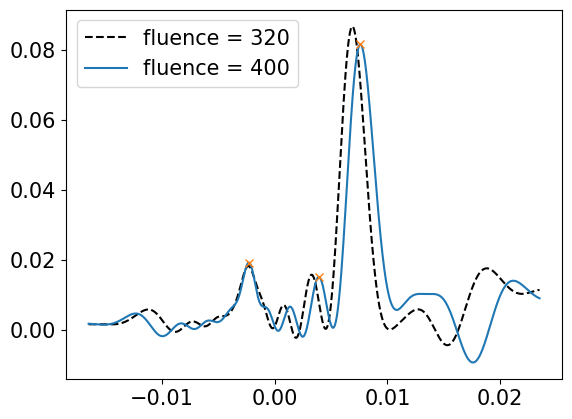

In [33]:
from scipy.signal import find_peaks
# look for local maxima and return corresponding time values
i = 12
redshifts = np.zeros_like(fluences)
maxima, _ = find_peaks(absorptions[i], height=0.015)
plt.plot(hbar*omega_list,absorptions[i-1], 'k--', label = r'fluence = {}'.format(fluences[i-1]))
plt.plot(hbar*omega_list,absorptions[i], label = r'fluence = {}'.format(fluences[i]))
plt.plot(hbar*omega_list[maxima], absorptions[i][maxima], "x")
print(maxima)
plt.legend()
plt.savefig('results/splitting_study/vergleich_fluences.pdf')
plt.show()


In [19]:
fluences = ['0.283', '1.415', '2.829', '8.487', '28.290','70.725', '99.015'] 

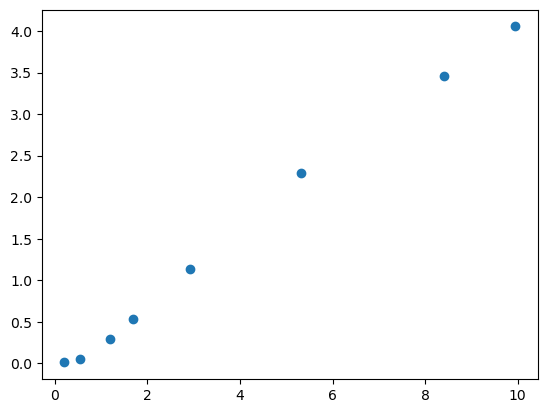

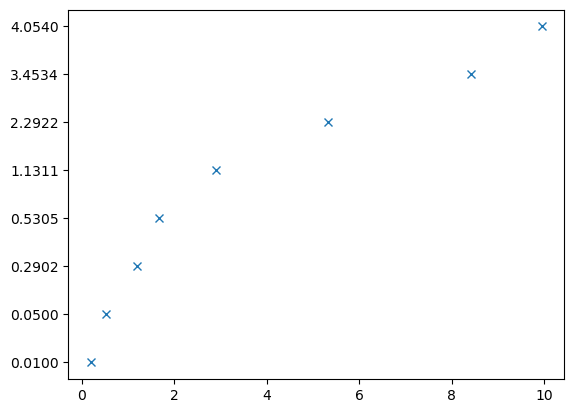

In [65]:
shifts = [float(high_energy_shift) for high_energy_shift in high_energy_shifts]
plt.plot(np.sqrt(np.array(fluences,dtype = float)), shifts , 'o')
plt.show()
plt.plot(np.sqrt(np.array(fluences,dtype = float)), high_energy_shifts , 'x')
plt.show()

In [40]:
print(fluences)

['0.283', '1.415', '2.829', '8.487', '28.290', '70.725', '99.015']
